In this file, we'll study and implement a new type of tree called a **B-tree**. B-trees allows us to store key-value pairs like a dictionary. However, they also allow us to perform **range searches** that dictionaries do not allow. A range search corresponds to a query where we want to retrieve all entries for which the key falls within a given range.

This feature of B-trees makes them specifically suited for building database indexes because they can naturally handle queries of the following form:

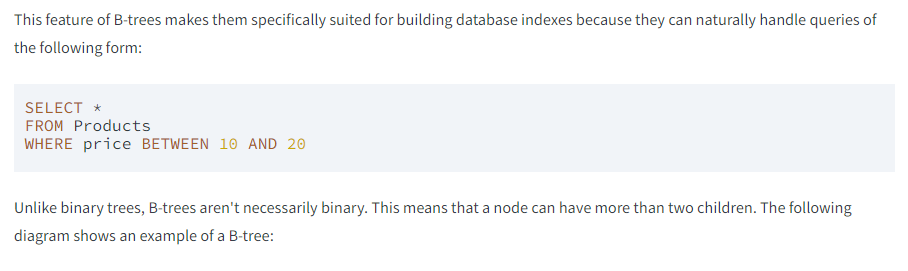

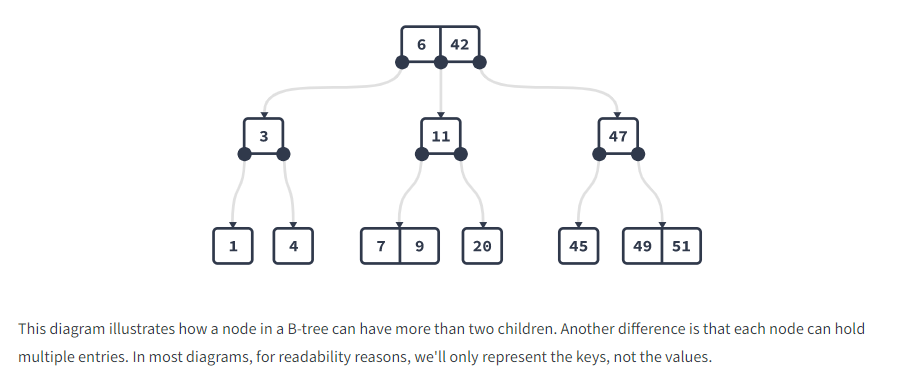

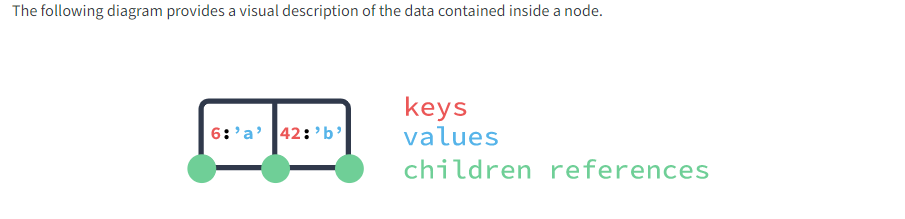

B-trees are complex data structures. In this file we'll focus on the node implementation. We'll implement the tree itself in the next file.

In our B-tree node implementation, we'll use two separate lists to represent the keys and the values. These lists will have the same length. The value at a given index is associated with the key, and it has the same index. For example, the node in the diagram above would have the following keys and values:

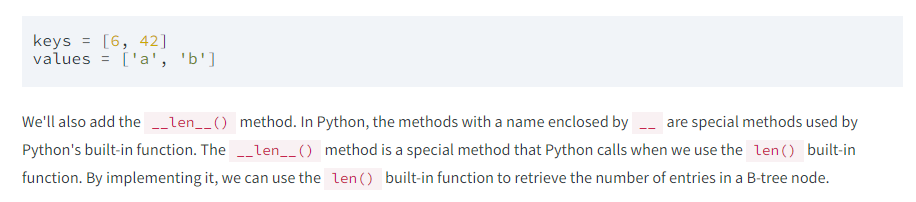

**Task**

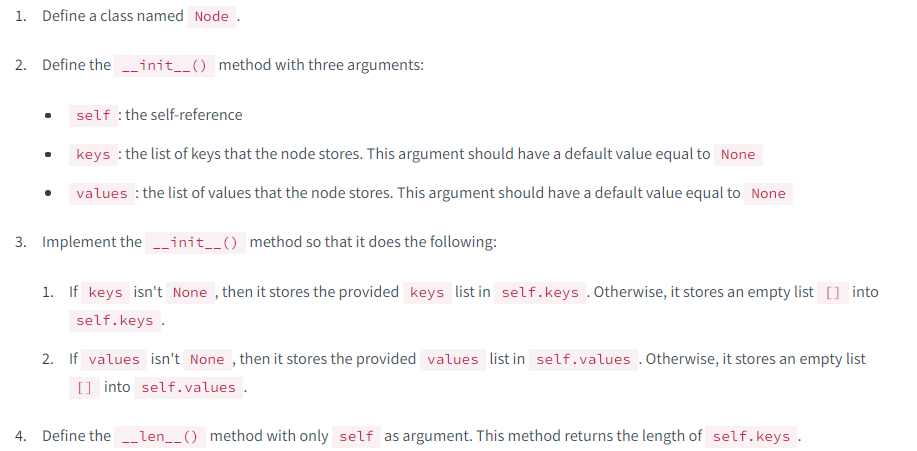

**Answer**

In [1]:
class Node: # Intruction 1
    
    def __init__(self, keys=None, values=None): # Instruction 2
        self.keys = keys or [] # Instruction 3.1
        self.values = values or [] # Instruction 3.2
    
    def __len__(self): # Instruction 4
        return len(self.values)

Above we started implementing a class to represent nodes in a B-tree by allowing a node to hold a list of keys and values.

Now we'll continue implementing the `Node` class so that a node can keep a list of children nodes. Recall that the children of a node are the nodes that are directly below it in the tree.

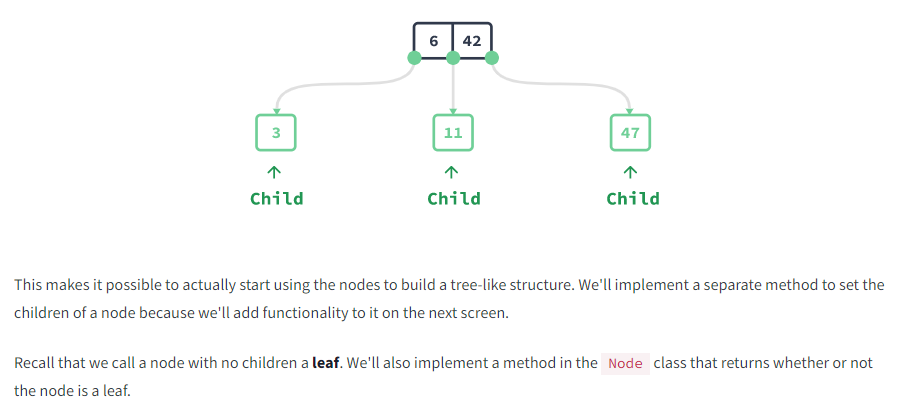

**Task**

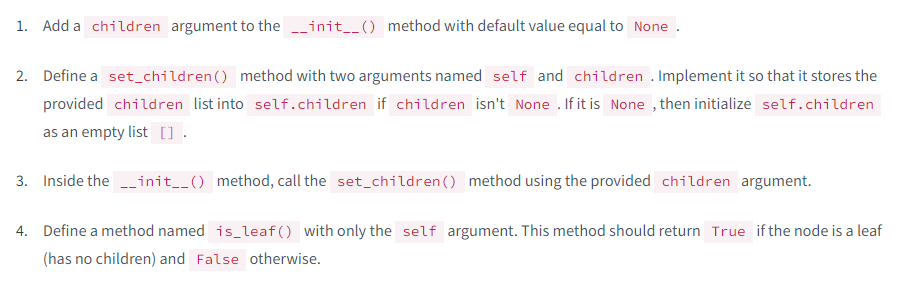

**Answer**

In [2]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None): # Intruction 1
        self.keys = keys or []
        self.values = values or []
        self.set_children(children) # Instruction 2
        
    def set_children(self, children): # Instruction 3
        self.children = children or []
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self): # Instruction 4
        return len(self.children) == 0

With the changes above, nodes can now represent a tree by keeping track of their children nodes.

As we'll see when we explore further into the implementation, it's convenient to also keep track of the parent of each node.

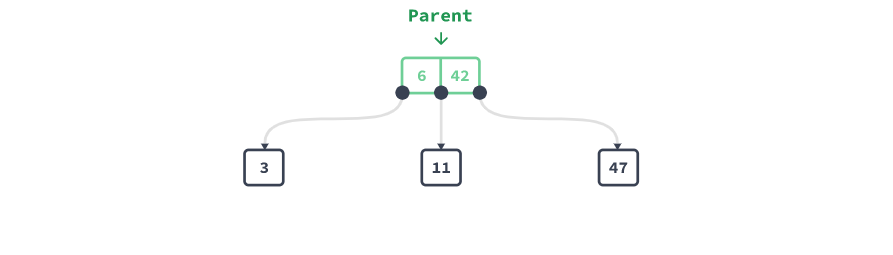

Now we'll add the possibility of specifying a parent when we create a node instance. We'll also make it so that the `set_children()` method sets the current node as the parent of each element in the provided `children` list.

**Task**

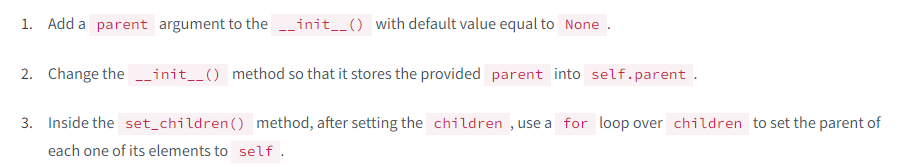

**Answer**

In [3]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None): # Instruction 1  
        self.keys = keys or []
        self.values = values or []
        self.parent = parent # Instruction 2
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children: # Instruction 3
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0

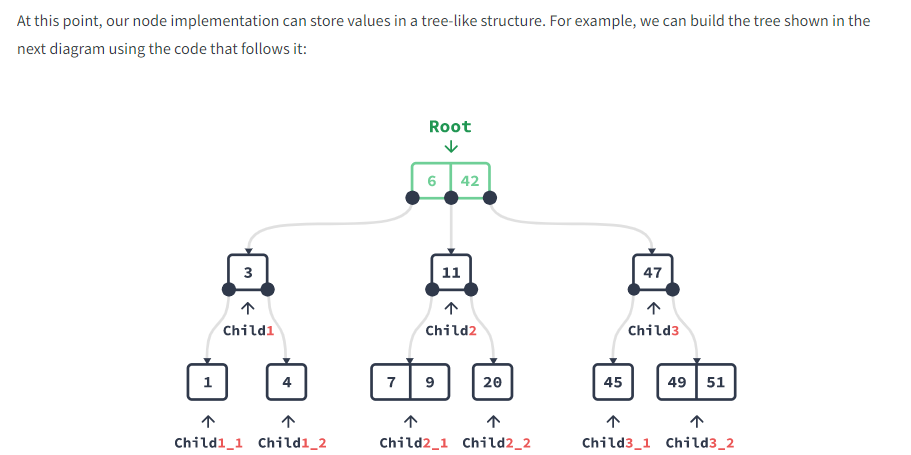

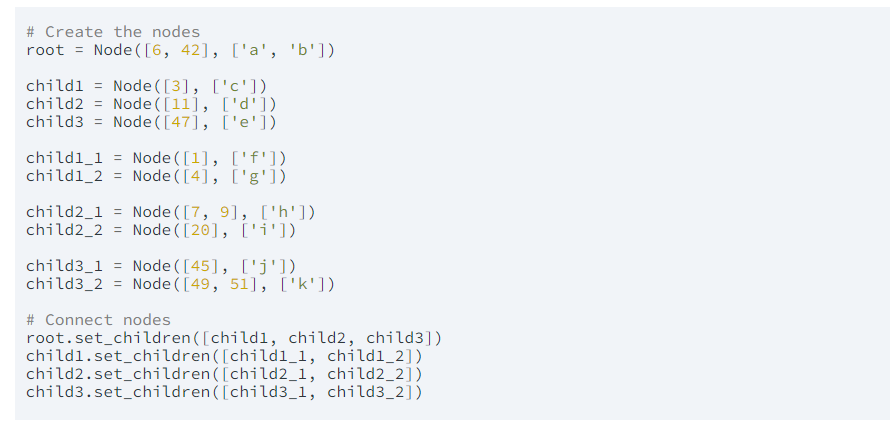

Of course, we won't be creating the tree manually like this. In the next file, once we implement the `Node` class, we'll implement a `BTree` class that automatically maintains a tree structure.

Let's continue giving functionality to our nodes by adding a method to lookup whether a node contains a given key. For now, this method simply checks whether a single node contains a given key. This method is instrumental when we implement lookups on the entire tree.

**Task**

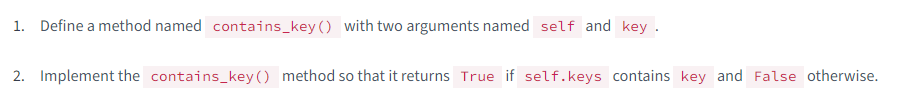

**Answer**

In [4]:
class Node:
                
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key): # Instruction 1
        return key in self.keys # Instruction 2

Above we implemented a method to check whether a node stores a given key. Now we'll implement a method that, given a key, determines the value associated with that key.

Remember that, in our implementation, keys and values are stored in two separate lists with the same length. The keys and values are associated implicitly by index. This means that the value at index 0 is associated with the key at index 0, the value at index 1 is associated with the key at index 1, and so on.

The following animation shows how value lookup works.

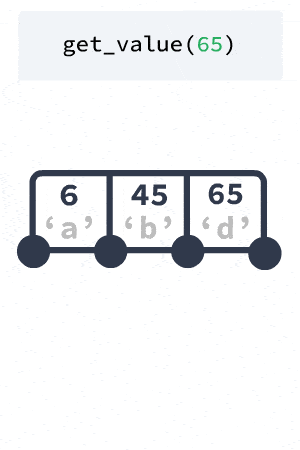

In [5]:
from IPython.display import Image

Image("5.1+-+m232.gif")

If the provided key doesn't exist, then we'll make the method return `None`.

**Task**

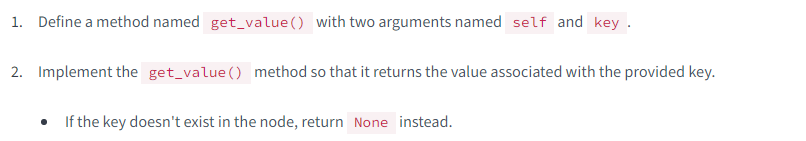

**Answer**

In [6]:
class Node:
                
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key): # Instruction 1
        for i, k in enumerate(self.keys): # Instruction 2
            if k == key:
                return self.values[i]
        return None

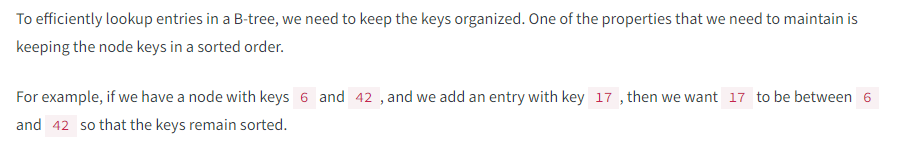

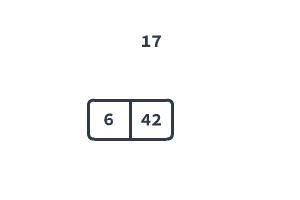

In [7]:
Image("5.1-m232.gif")

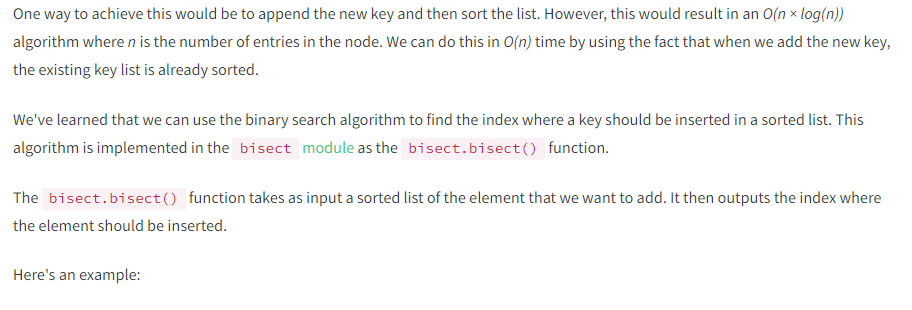

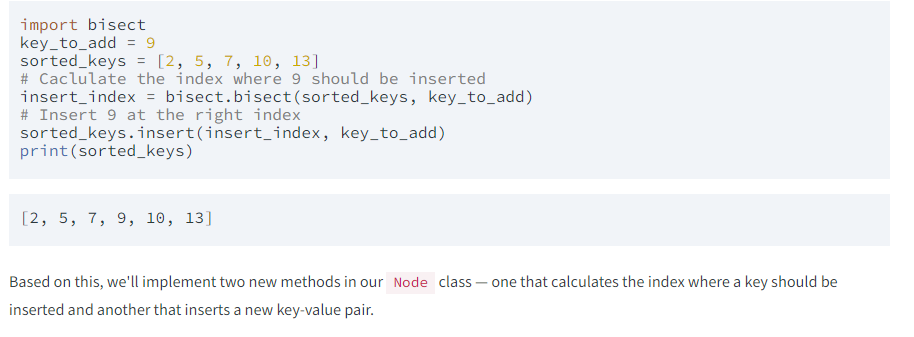

**Task**

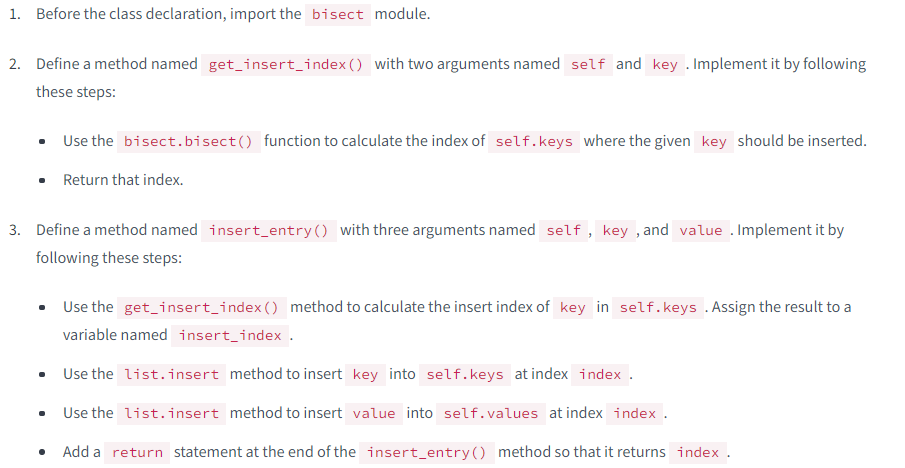

**Answer**

In [8]:
import bisect # Intruction 1

class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key):
        for i, k in enumerate(self.keys):
            if k == key:
                return self.values[i]
        return None
    
    def get_insert_index(self, key): # Instruction 2
        return bisect.bisect(self.keys, key)

    def insert_entry(self, key, value): # Instruction 3
        insert_index = self.get_insert_index(key) # Instruction 3.1
        self.keys.insert(insert_index, key) # Instruction 3.2
        self.values.insert(insert_index, value) # Instruction 3.3
        return insert_index # Instruction 3.4

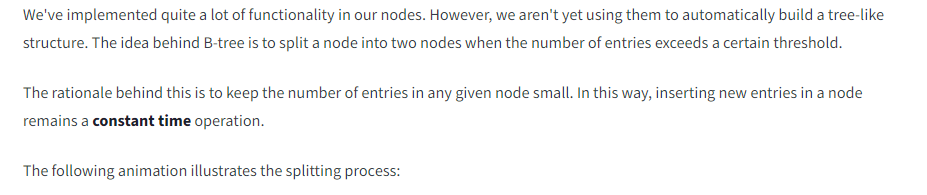

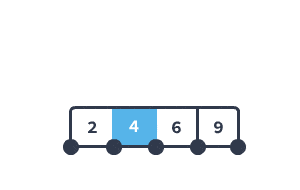

In [9]:
Image("6.1-m232.gif")

Now we'll focus on splitting a node that doesn't have a parent (as in the animation). To do so, we need to create a new node to be the parent of the two split nodes. Then, we move the middle value to the new node and separate the initial node into two nodes.

Our assumption is that the node that we're splitting doesn't have a parent. However, it can have children, and we need to make sure that we also split those correctly.

Let's zoom in a little and add the indexes to better visualize exactly which indexes belong to the left child and which ones belong to the right child:

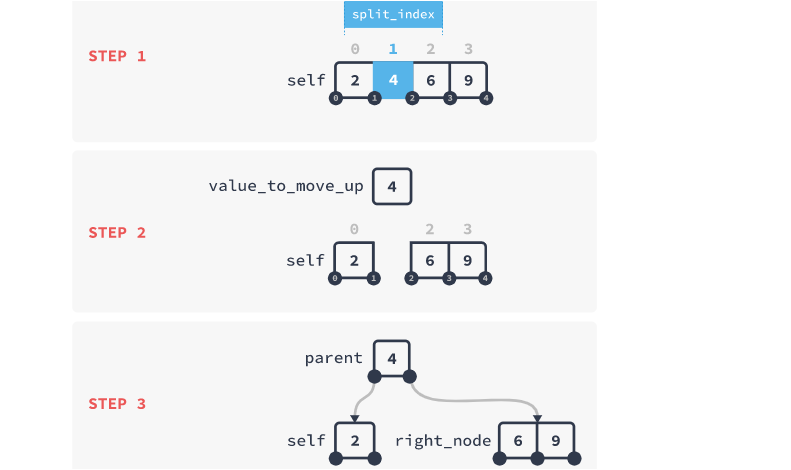

Note that we keep the node over which the split method was called, `self`, as the left node rather than creating a new one.

**Task**

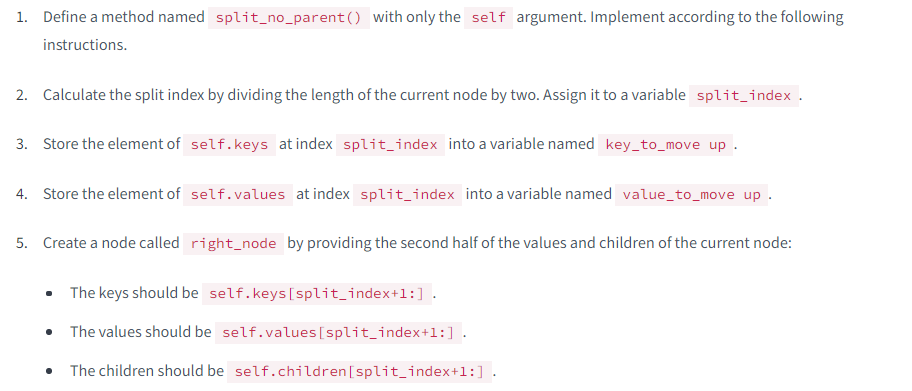

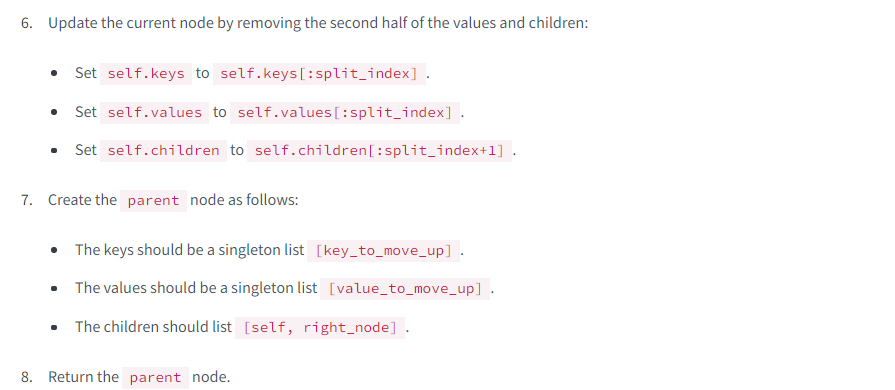

**Answer**

In [10]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key):
        for i, k in enumerate(self.keys):
            if k == key:
                return self.values[i]
        return None
    
    def get_insert_index(self, key):
        return bisect.bisect(self.keys, key)

    def insert_entry(self, key, value):
        insert_index = self.get_insert_index(key)
        self.keys.insert(insert_index, key)
        self.values.insert(insert_index, value)
        return insert_index
    
    def split_no_parent(self): # Instruction 1
        split_index = len(self) // 2 # Instruction 2
        key_to_move_up = self.keys[split_index] # Instruction 3
        value_to_move_up = self.values[split_index] # Inctruction 4
        # Instruction 5
        right_node = Node(
            self.keys[split_index+1:], 
            self.values[split_index+1:], 
            self.children[split_index+1:]
        )
        self.keys = self.keys[:split_index] # Instruction 6
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        parent = Node([key_to_move_up], [value_to_move_up], [self, right_node]) # Instruction 7
        return parent # Instruction 8

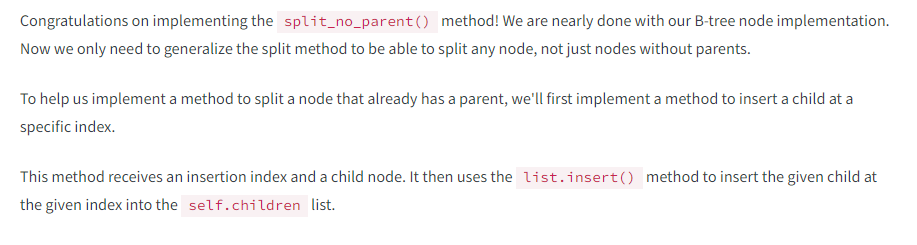

**Task**

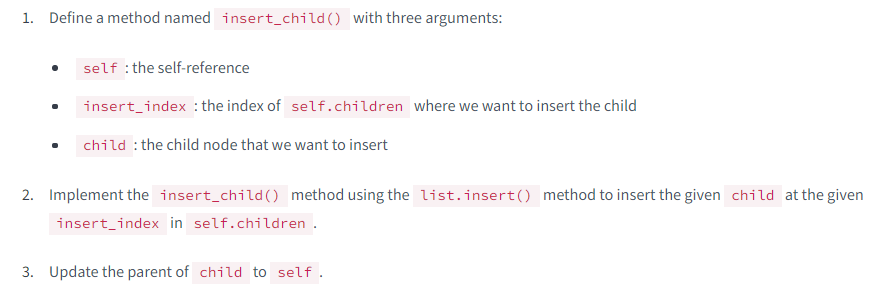

**Answer**

In [11]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key):
        for i, k in enumerate(self.keys):
            if k == key:
                return self.values[i]
        return None
    
    def get_insert_index(self, key):
        return bisect.bisect(self.keys, key)

    def insert_entry(self, key, value):
        insert_index = self.get_insert_index(key)
        self.keys.insert(insert_index, key)
        self.values.insert(insert_index, value)
        return insert_index
    
    def split_no_parent(self):
        split_index = len(self) // 2
        key_to_move_up = self.keys[split_index]
        value_to_move_up = self.values[split_index]
        right_node = Node(self.keys[split_index+1:], self.values[split_index+1:], self.children[split_index+1:])
        self.keys = self.keys[:split_index]
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        parent = Node([key_to_move_up], [value_to_move_up], [self, right_node])
        return parent

    def insert_child(self, insert_index, child): # Instruction 1
        self.children.insert(insert_index, child) # Instruction 2
        child.parent = self # Instruction 3

We are now ready to generalize the split method and become capable of splitting any node, not only nodes without parents.

The process of splitting a node that has a parent is very similar. The difference is that, instead of creating a new parent containing middle entry, we move the middle entry to the existing parent.

The following animation illustrates this process.

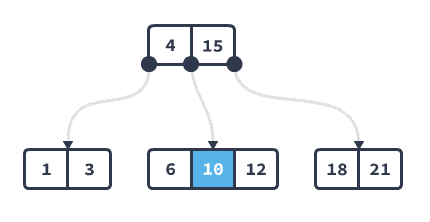

In [12]:
Image("8.1-m232.gif")

As we can see, the process is quite similar to what we've done in the previous split method.

In this case, we also need to insert the right child of the split node in the children list of the parent. This is where we'll use the `insert_child()` method that we implemented above.

As we can see in the following diagram, the index in the `children` list where we need to insert the right child is equal to the index where the key was inserted plus one. So, for example, if the key was inserted at index `1` then the child should be inserted at index `2` of the children list.

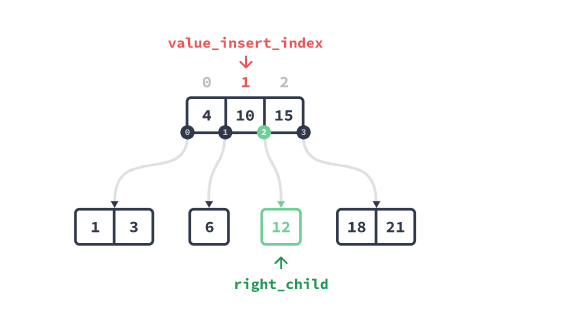

**Task**

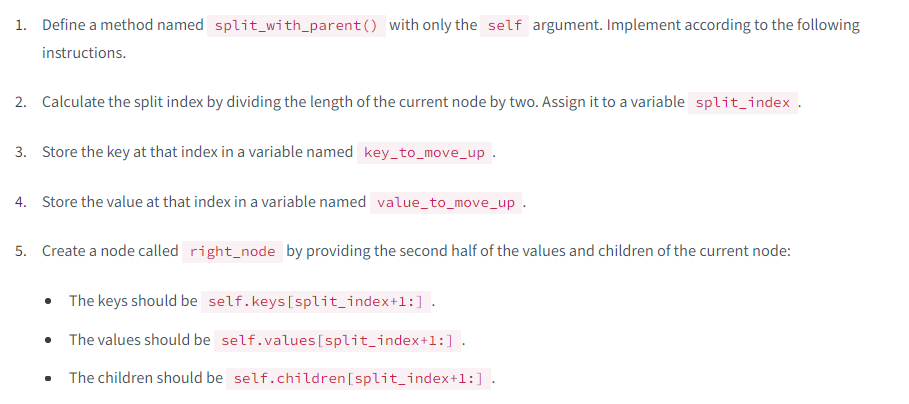

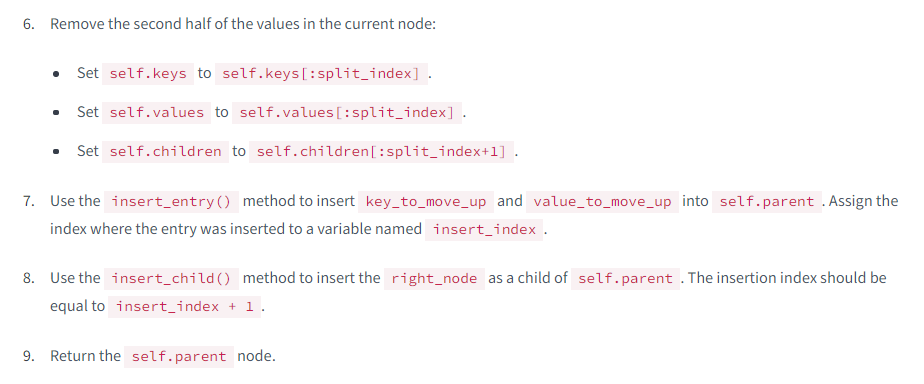

**Answer**

In [13]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key):
        for i, k in enumerate(self.keys):
            if k == key:
                return self.values[i]
        return None
    
    def get_insert_index(self, key):
        return bisect.bisect(self.keys, key)

    def insert_entry(self, key, value):
        insert_index = self.get_insert_index(key)
        self.keys.insert(insert_index, key)
        self.values.insert(insert_index, value)
        return insert_index
    
    def split_no_parent(self):
        split_index = len(self) // 2
        key_to_move_up = self.keys[split_index]
        value_to_move_up = self.values[split_index]
        right_node = Node(self.keys[split_index+1:], self.values[split_index+1:], self.children[split_index+1:])
        self.keys = self.keys[:split_index]
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        parent = Node([key_to_move_up], [value_to_move_up], [self, right_node])
        return parent

    def insert_child(self, insert_index, child):
        self.children.insert(insert_index, child)
        child.parent = self
        
    def split_with_parent(self): # Instruction 1
        split_index = len(self) // 2 # Instruction 2
        key_to_move_up = self.keys[split_index] # Instruction 3
        value_to_move_up = self.values[split_index] # Instruction 4
        # Instruction 5
        right_node = Node(
            self.keys[split_index+1:], 
            self.values[split_index+1:], 
            self.children[split_index+1:]
        )
        # Instruction 6
        self.keys = self.keys[:split_index]
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        # Instruction 7
        insert_index = self.parent.insert_entry(key_to_move_up, value_to_move_up)
        self.parent.insert_child(insert_index + 1, right_node) # Instruction 8
        return self.parent # Instruction 9

Great success! We've managed to successfully implement a class to represent nodes in a B-tree. In the next file, we'll implement the tree itself. As we will see, the work we've accomplished here makes it much easier to implement a fully functional tree.

Before we close this file, we'll implement one last method, `split()`, that splits a node in general. This method either calls `split_no_parent()` if the node doesn't have a parent or `split_with_parent()` if it does.

Using this method, we won't have to worry about these two cases when we implement the B-tree. It will allow us to simply call `split()` whenever we want to split a node.

**Task**

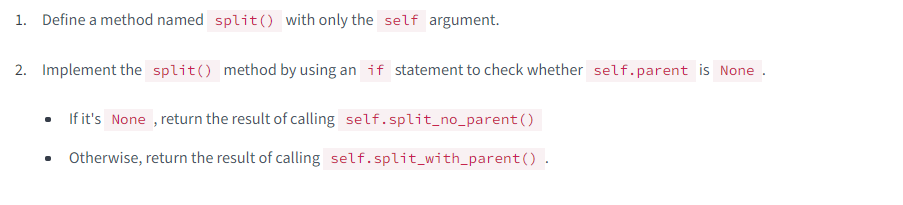

**Answer**

In [14]:
class Node:
    
    def __init__(self, keys=None, values=None, children=None, parent=None):
        self.keys = keys or []
        self.values = values or []
        self.parent = parent
        self.set_children(children) 
        
    def set_children(self, children): 
        self.children = children or []
        for child in self.children:
            child.parent = self
    
    def __len__(self):
        return len(self.values)

    def is_leaf(self):
        return len(self.children) == 0
    
    def contains_key(self, key):
        return key in self.keys
    
    def get_value(self, key):
        for i, k in enumerate(self.keys):
            if k == key:
                return self.values[i]
        return None
    
    def get_insert_index(self, key):
        return bisect.bisect(self.keys, key)

    def insert_entry(self, key, value):
        insert_index = self.get_insert_index(key)
        self.keys.insert(insert_index, key)
        self.values.insert(insert_index, value)
        return insert_index
    
    def split_no_parent(self):
        split_index = len(self) // 2
        key_to_move_up = self.keys[split_index]
        value_to_move_up = self.values[split_index]
        right_node = Node(self.keys[split_index+1:], self.values[split_index+1:], self.children[split_index+1:])
        self.keys = self.keys[:split_index]
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        parent = Node([key_to_move_up], [value_to_move_up], [self, right_node])
        return parent

    def insert_child(self, insert_index, child):
        self.children.insert(insert_index, child)
        child.parent = self
        
    def split_with_parent(self): 
        split_index = len(self) // 2
        key_to_move_up = self.keys[split_index]
        value_to_move_up = self.values[split_index]
        right_node = Node(self.keys[split_index+1:], self.values[split_index+1:], self.children[split_index+1:])
        self.keys = self.keys[:split_index]
        self.values = self.values[:split_index]
        self.children = self.children[:split_index+1]
        insert_index = self.parent.insert_entry(key_to_move_up, value_to_move_up)
        self.parent.insert_child(insert_index + 1, right_node)
        return self.parent
    
    def split(self): # Instruction 1
        if self.parent is None: # Instruction 2
            return self.split_no_parent()
        return self.split_with_parent()

In this file, we started implementing a new type of tree called a B-tree. We've successfully implemented the **Node** class to represent the B-tree nodes.

In the next file, we'll implement the `BTree` class that uses the `Node` implementation that we've developed here to implement a B-tree. A B-tree is a tree data structure where we can efficiently implement database indexes.